<a href="https://colab.research.google.com/github/SUMIT74184/Machine-learning-journey/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.Neural Network classification with pytorch

Classification is a problem of predicting whether something is one thing or another thing( there ca be multiple things as the options)

In [3]:
import torch

## 1. Make classification data and get it ready

In [4]:
import sklearn

In [5]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# make 1000 samples
n_Samples = 1000

# Create circles
X,y =make_circles(n_Samples,
                   noise=0.03,
                   random_state=42
                   )

In [6]:
len(X), len(y)

(1000, 1000)

In [7]:
print(f"Frist 5 samples of x:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

Frist 5 samples of x:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [8]:
# Make DataFrame of circle data
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


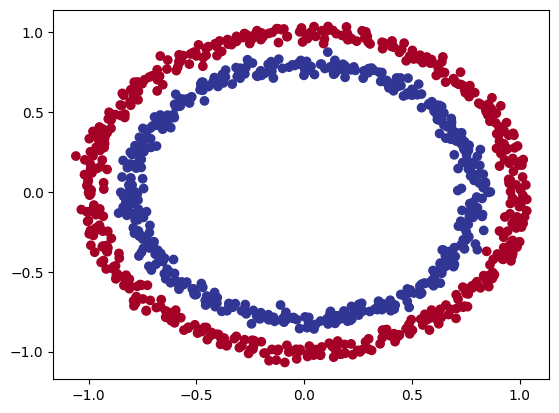

In [9]:
# Vislualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

**Note**: The data we're working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [10]:
X.shape , y.shape

((1000, 2), (1000,))

In [11]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [12]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.tensor(X, dtype=torch.float32, device=device)

In [14]:
 # Turn data into tensors
X=torch.as_tensor(X).type(torch.float)
y=torch.as_tensor(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
# Split data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               train_size=0.8, # 0.2=20% of the data and 80% for the taining set
                                               random_state=42
                                               )


In [17]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [18]:
n_Samples

1000

## 2.Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:

1. setup device agnostic code so our code wil run on an accelerator (GPU) if there is one

2. Construct a model (by subclassing `nn.Module`)

3. Define a loss FUnction and Optimizer

4. Create a training and test loop


In [19]:
from torch import nn
## Make device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code,lets create the model that:

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.Module`)

2. Create `nn.Linear()` layers that are capable of handling the shapes of our data

3. Defines a `Forward()` method that outlines the forward pass (or forward computation) of the model

4. Instatiate an instance of our model class and send it to the target `device`




In [20]:
X_train.shape

torch.Size([800, 2])

In [21]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 . Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5) # takes in 2 Features and upscales to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layers and outputs a single feature(same shape as y)

  # Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1->layer_2 -> output

 # 4 .Instatiate an instance of our model class and send it to the target device

model_0=CircleModelV0().to(device)

model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
# Let's replicate the model above using nn.Sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)

).to(device)

In [25]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3287,  0.3168],
                      [ 0.5246, -0.1240],
                      [ 0.5253,  0.1339],
                      [ 0.0912,  0.1554],
                      [ 0.5068,  0.3811]])),
             ('0.bias', tensor([ 0.1541,  0.1337, -0.0131, -0.2429, -0.2285])),
             ('1.weight',
              tensor([[-0.4456, -0.0900, -0.4403, -0.2496,  0.4308]])),
             ('1.bias', tensor([-0.3044]))])

In [27]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)},shape:{untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)},shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200,shape:torch.Size([200, 1])
Length of test samples:200,shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.4844],
        [-0.4772],
        [-0.4418],
        [-0.4967],
        [-0.3443],
        [-0.3406],
        [-0.3976],
        [-0.3654],
        [-0.4460],
        [-0.4756]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use?

Again....this is the problem specific.

For exp - regression you might want MAE orMSE (mean absoute error or mean squared error)

For classification you might want cross entropy or categorical cross entropy

The loss function measures How **wrong** our predictions are

For optimizers, two of the most common and useful `SGD` and  `Adam`

* For the loss function we're going to use `torch.nn.BECWithLogisticLoss()` , for more on what binary cross entropy (BCE)

* For different optimizers see torch.optim




In [28]:
## Setup the loss function
# loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1

                          )

In [29]:
# Calculate accuracy - out of 100 exampes, what percentage does out model get right?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


## 3.Train Model

To train our model, we're going to need to build a training loops

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. optimizer step (gradient descent)


### 3.1 Going from raw logits --> prediction probabilities --> prediction labels

our model outputs are going to be raw **logits**.

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g.sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [30]:
# View the first 5 outputts of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4844],
        [-0.4772],
        [-0.4418],
        [-0.4967],
        [-0.3443]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use  the sigmoid activation function on our model logits to tur them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.3812],
        [0.3829],
        [0.3913],
        [0.3783],
        [0.4148]])

For our prediction probability  value, we need to perform a range-styple rounding on them:

*`y_pred_probs`>=0.5, y=1 , class 1

*`y_pred_probs` <0.5 , y=0 class 0

In [33]:
# Find the predicted labels
y_preds=torch.round(y_pred_probs)


#In full (logits -> pred probs -->pred labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


# torch.round(y_pred_probs)

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a training and testing loop

In [34]:
device

'cpu'

In [35]:
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put the data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


#Building training and evaluation loop
for epoch in range(epochs):
  ## training
  model_0.train()

  # 1 forward pass
  y_logits=model_0(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits)) # turn logits->pred probs -> pred labels

  # 2 calculate loss/accuracy
 # loss = loss_fn(torch.sigmoid(y_logits)) ## nn.BCELoss expects prediction probabilities as input


  loss=loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
               y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred
                  )

  # Optimizer zero grad
  optimizer.zero_grad()

  # 4 loss backward
  loss.backward()

  # 5 Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
      #1 Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2 calculate test loss/acc
      test_loss = loss_fn(test_logits,y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred
                             )
  # Prinnt out what's happenin
  if epoch % 10 ==  0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f},test acc: {test_acc:.2f}%")


Epoch:0 | Loss:0.71524, Acc:50.00% | Test loss:0.71292,test acc: 50.00%
Epoch:10 | Loss:0.70247, Acc:50.00% | Test loss:0.70095,test acc: 50.00%
Epoch:20 | Loss:0.69723, Acc:50.00% | Test loss:0.69605,test acc: 50.00%
Epoch:30 | Loss:0.69504, Acc:50.00% | Test loss:0.69406,test acc: 50.00%
Epoch:40 | Loss:0.69410, Acc:50.00% | Test loss:0.69329,test acc: 50.00%
Epoch:50 | Loss:0.69367, Acc:46.25% | Test loss:0.69303,test acc: 46.50%
Epoch:60 | Loss:0.69345, Acc:44.00% | Test loss:0.69299,test acc: 46.00%
Epoch:70 | Loss:0.69333, Acc:47.62% | Test loss:0.69304,test acc: 46.50%
Epoch:80 | Loss:0.69326, Acc:48.00% | Test loss:0.69313,test acc: 45.50%
Epoch:90 | Loss:0.69321, Acc:49.88% | Test loss:0.69323,test acc: 45.00%
Epoch:100 | Loss:0.69316, Acc:50.25% | Test loss:0.69333,test acc: 46.50%
Epoch:110 | Loss:0.69313, Acc:49.38% | Test loss:0.69344,test acc: 49.00%
Epoch:120 | Loss:0.69311, Acc:49.12% | Test loss:0.69354,test acc: 48.50%
Epoch:130 | Loss:0.69308, Acc:49.38% | Test loss:

## 4 Make predictions and evaluate the model

From thee mertics it looks like our model isn't learning anything....

so to inspect it let's make some predictions and make them visual!

In other words, 'Visualize it"

To do so, we're going to import a function called `plot_decision_boundary()`

In [36]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


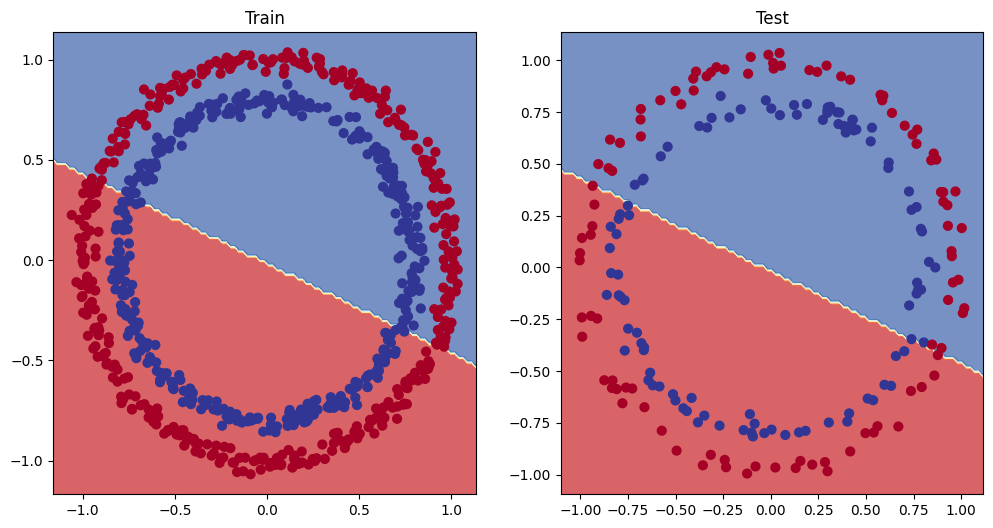

In [37]:
# Plot decision boundary boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5  Improving a model (from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 units to 10 hidden units

* Fit for longer

* changing the activation functions

* change the learning rate--->exploding gradient problem

* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientis) can change they are refered **Hyperparameter**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 ->1000



In [38]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)

    # also

    return self.layer_3(self.layer_2(self.layer_1(x)))  # this way or witring operations speeds up the process

model_1=CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optmizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)



In [40]:
# Writing an training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ##Training
  model_1.train()

  # Forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) # logits-> pred probailities -> predictions

  # 2 Calculate the loss/acc
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred
                  )

  # 3 Optimizer zero grad
  optimizer.zero_grad()

  # 4 Loss backward (backpropagation)
  loss.backward()

  # 5 Optimizer step (gradient descent)
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    #1 FOrward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    # calculate the test loss
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred
                         )
  # print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch{epoch} | Loss: {loss:.5f}, | Acc:{acc:.2f}, | Test loss:{test_loss:.5f}, | test acc: {test_acc:.2f}")



Epoch0 | Loss: 0.69396, | Acc:50.88, | Test loss:0.69261, | test acc: 51.00
Epoch100 | Loss: 0.69369, | Acc:50.25, | Test loss:0.69269, | test acc: 50.00
Epoch200 | Loss: 0.69351, | Acc:50.12, | Test loss:0.69282, | test acc: 49.50
Epoch300 | Loss: 0.69339, | Acc:50.50, | Test loss:0.69295, | test acc: 49.00
Epoch400 | Loss: 0.69329, | Acc:50.38, | Test loss:0.69309, | test acc: 48.50
Epoch500 | Loss: 0.69322, | Acc:49.88, | Test loss:0.69322, | test acc: 49.50
Epoch600 | Loss: 0.69317, | Acc:49.50, | Test loss:0.69335, | test acc: 53.00
Epoch700 | Loss: 0.69313, | Acc:49.38, | Test loss:0.69347, | test acc: 50.50
Epoch800 | Loss: 0.69309, | Acc:50.00, | Test loss:0.69358, | test acc: 51.00
Epoch900 | Loss: 0.69307, | Acc:50.62, | Test loss:0.69368, | test acc: 47.50


In [41]:
# Plot the decision boundary


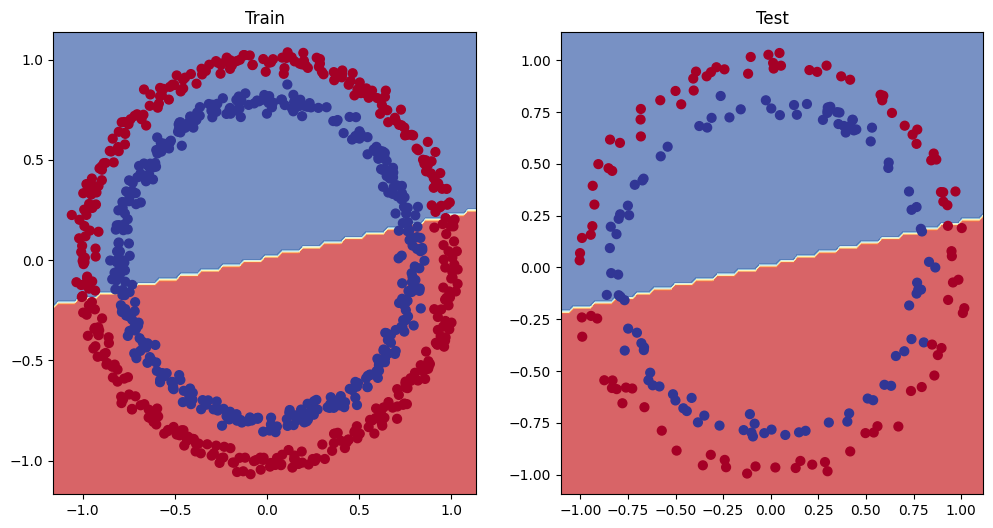

In [42]:
# Plot decision boundary boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem

In [43]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Wonderful, now let's split our data into training and test sets.

In [44]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20



Beautiful, let's see how the data looks.

To do so, we'll use the plot_predictions() function we created in notebook 01.

It's contained within the helper_functions.py script on the Learn PyTorch for Deep Learning repo which we downloaded above.

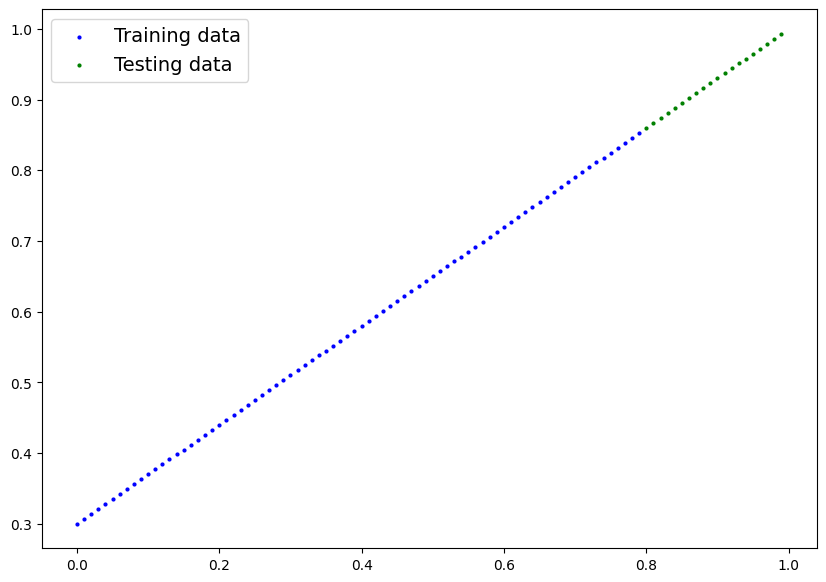

In [45]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 Adjusting model_1 to fit a straight line
Now we've got some data, let's recreate model_1 but with a loss function suited to our regression data.

In [46]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [47]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [48]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


Okay, unlike model_1 on the classification data, it looks like model_2's loss is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target device, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using .cpu() when we pass it to plot_predictions().

In [49]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

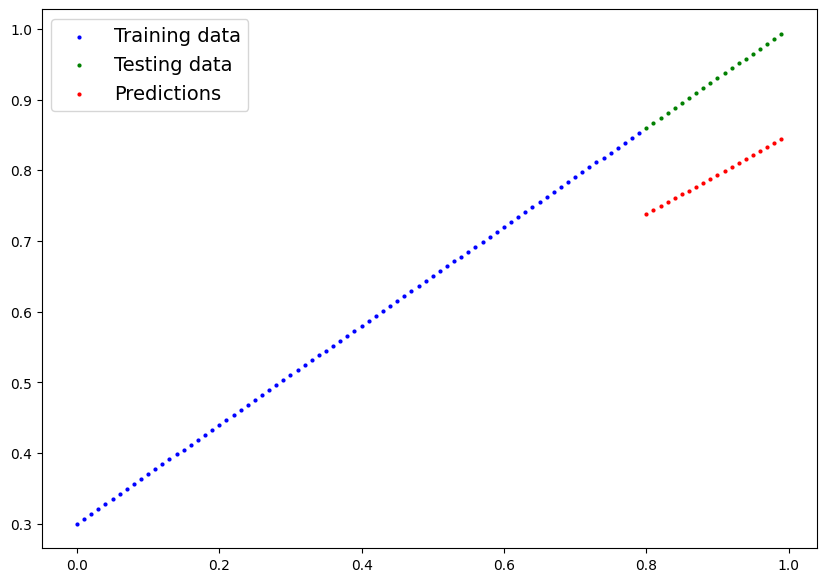

In [50]:
# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6  Training the missing piece:non-linearity

"what patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

or in machine learning terms, an infinte (but really it is finite)

### 6.1 Recreating non-linear data (red and blue circles)

In [51]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

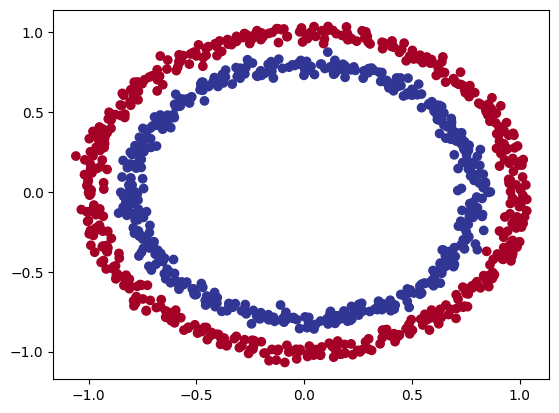

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [53]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear(straight) and non-linear functions which are potentially able to find patterns in data

In [54]:
import torch
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() #relu is a non-linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
# setup loss and optimiser
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(model_3.parameters(),
                          lr=0.1
                          )

### 6.3 Training a model with non-linearity

In [56]:
# Random
torch.manual_seed(42)

#put all data on target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Loops through data
epochs = 1000
for epoch in range(epochs):
  # Training
  model_3.train()

  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) #logits -->prediction probabilities ->prediction labels

  # Calculate the loss
  loss=loss_fn(y_logits,y_train) #--- making mistake while using the correct training label
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred
                  )

  # Optimizer zero grad
  optimizer.zero_grad()


  # Loss backward
  loss.backward()

  # Step
  optimizer.step()

  model_3.eval()

  #testing
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #Calculate the test loss
    test_loss=loss_fn(test_logits,y_test)
    test_Acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred
                         )
  if epoch % 100 == 0:
    print(f" Epoch: {epoch} | Loss:{loss:.4f} | Acc:{acc:.2f}% | Test Loss : {test_loss:.4f}, Test Acc :{test_Acc:.2f}%")





 Epoch: 0 | Loss:0.6929 | Acc:50.00% | Test Loss : 0.6932, Test Acc :50.00%
 Epoch: 100 | Loss:0.6912 | Acc:52.88% | Test Loss : 0.6910, Test Acc :52.50%
 Epoch: 200 | Loss:0.6898 | Acc:53.37% | Test Loss : 0.6894, Test Acc :55.00%
 Epoch: 300 | Loss:0.6879 | Acc:53.00% | Test Loss : 0.6872, Test Acc :56.00%
 Epoch: 400 | Loss:0.6852 | Acc:52.75% | Test Loss : 0.6841, Test Acc :56.50%
 Epoch: 500 | Loss:0.6810 | Acc:52.75% | Test Loss : 0.6794, Test Acc :56.50%
 Epoch: 600 | Loss:0.6751 | Acc:54.50% | Test Loss : 0.6729, Test Acc :56.00%
 Epoch: 700 | Loss:0.6666 | Acc:58.38% | Test Loss : 0.6632, Test Acc :59.00%
 Epoch: 800 | Loss:0.6516 | Acc:64.00% | Test Loss : 0.6476, Test Acc :67.50%
 Epoch: 900 | Loss:0.6236 | Acc:74.00% | Test Loss : 0.6215, Test Acc :79.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [57]:
# makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

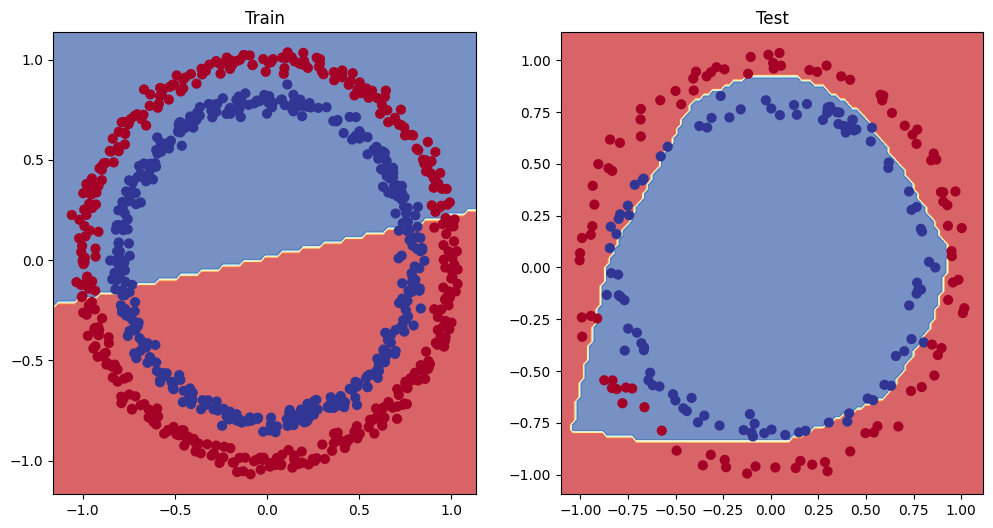

In [58]:
#Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train) # model_1 has no linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test) # model_3 has the linearity

### Challenge:- accuracy to more than 80%

## 7 Replicating non-linear activation functions

Neural networks,rather than us telling the model what to learn,we give it the tools to discover patterns in data it tries to figure out the patterns on its own

And these tools are linear and non-linear functions

In [59]:
# Create a tensor
A= torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [60]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

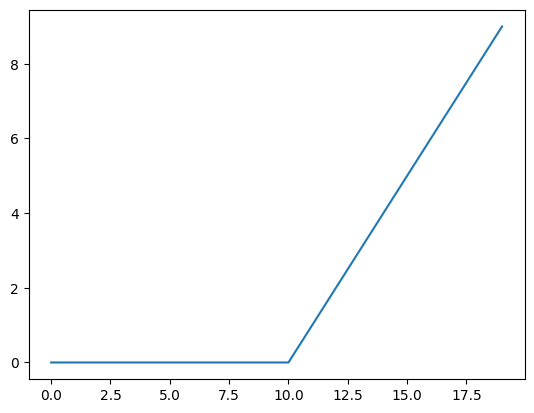

In [61]:
plt.plot(torch.relu(A))

In [62]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

In [63]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [64]:
# Plot ReLU activation function


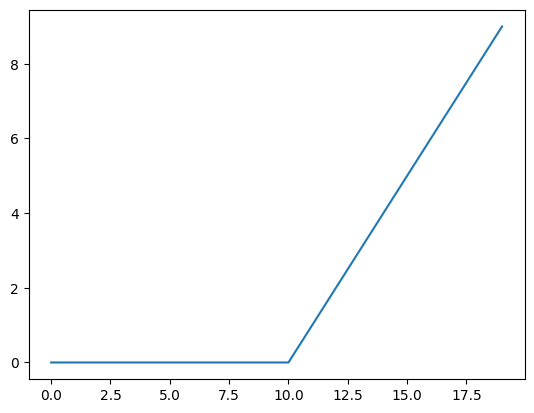

In [65]:
plt.plot(relu(A))

In [66]:
# Now lest do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

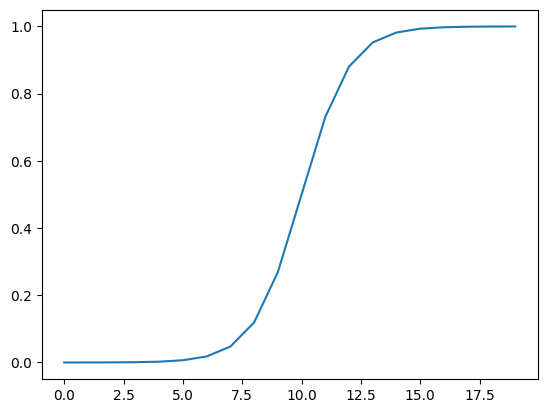

In [67]:
plt.plot(torch.sigmoid(A))

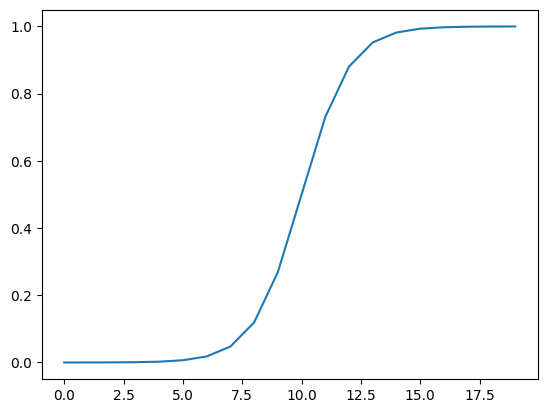

In [68]:
plt.plot(sigmoid(A))

## 8 Putting it all together with a multiclass classification problem

* Binary classification = one thing or another (cat vs dog , spam vs not spam, fraud or not fraud)

* Multi-class classification = more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset


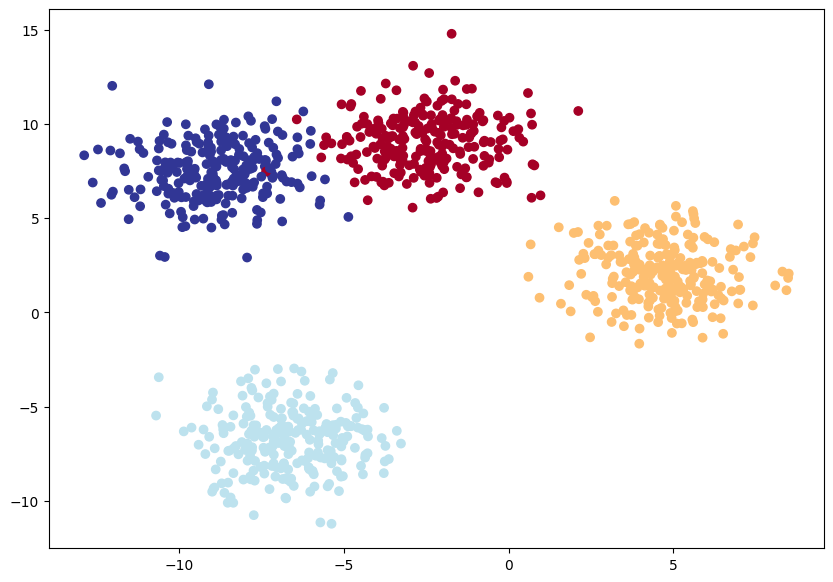

In [69]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob,y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob =torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # y_blob should be long for CrossEntropyLoss

#3 split into train and test data
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,
                                                                   y_blob,
                                                                   train_size=0.8,
                                                                   random_state=RANDOM_SEED

                                                                   )

# 4 .plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in Pytorch

In [70]:
# Create device agnostic code
device="cuda"if torch.cuda.is_available() else "cpu"

In [71]:
device

'cpu'

In [72]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes multi-class classification model,

    Args:
      input_features (int):Number of input features to the model
      Output_features (int): Number of  output features to the model
      hidden_units (int): Number of hidden units between layers, default 8

      Returns:

    """
    super().__init__()

    self.linear_layer_stack =  nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
     )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Setting up the loss function and an optimizer for a multiclass classification

In [73]:

 # Create a loss function for multi class classification - loss function measures how wrong our model's predictions are
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),
                           lr=0.1  # hyperparameter (we can change it later)
                           )

### 8.4  Getting prediction probabilities for a multi-class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs  (logits) to prediction probabilities and then prediction labels

logits (raw output of the model) -> pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probailities)

In [74]:
next(model_4.parameters()).device

device(type='cpu')

In [75]:
# let's get some raw outputs of out model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_train).to(device)


In [76]:
# Convert out model's logits outputs to prediction probabilities
y_pred_pobs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])

print(y_pred_pobs[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]])
tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]])


In [77]:
torch.sum(y_pred_pobs[0])

tensor(1.)

In [78]:
torch.max(y_pred_pobs[0])

tensor(0.3328)

In [79]:
torch.argmax(y_pred_pobs[3]) ## cecks out which tensor values will be more feasible

tensor(0)

In [80]:
# COnvert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_pobs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.5 Creating a training loop and testing loop for multi-class  model

In [81]:
# Fit the multi-class model to the data
torch.manual_seed(42)

# set number of epochs
epochs = 100

# Put data to the target device
X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  # Training
  model_4.train()

  y_logits =model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred
                  )

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds
                           )


  #print out what's happenin
  if epoch % 10 == 0:
    print(f"epochs :{epoch} | Loss: {loss:.4f} ,| Acc: {acc:.2f}% | Test loss : {test_loss:.4f}, Test acc :{test_acc:.2f}% ")


epochs :0 | Loss: 1.1588 ,| Acc: 40.38% | Test loss : 1.0755, Test acc :48.00% 
epochs :10 | Loss: 0.6448 ,| Acc: 96.75% | Test loss : 0.6607, Test acc :97.50% 
epochs :20 | Loss: 0.4254 ,| Acc: 98.50% | Test loss : 0.4307, Test acc :100.00% 
epochs :30 | Loss: 0.2529 ,| Acc: 99.12% | Test loss : 0.2451, Test acc :99.50% 
epochs :40 | Loss: 0.1123 ,| Acc: 99.25% | Test loss : 0.1023, Test acc :99.50% 
epochs :50 | Loss: 0.0663 ,| Acc: 99.25% | Test loss : 0.0585, Test acc :99.50% 
epochs :60 | Loss: 0.0507 ,| Acc: 99.25% | Test loss : 0.0429, Test acc :99.50% 
epochs :70 | Loss: 0.0430 ,| Acc: 99.25% | Test loss : 0.0349, Test acc :99.50% 
epochs :80 | Loss: 0.0384 ,| Acc: 99.25% | Test loss : 0.0299, Test acc :99.50% 
epochs :90 | Loss: 0.0352 ,| Acc: 99.25% | Test loss : 0.0266, Test acc :99.50% 


### 8.6 Making and evaluating predictions with a Pytorch multi-class model

In [82]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)


  # View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [83]:
# Go from logits-> prediction probabilities
y_preds_probs=torch.softmax(y_logits,dim=1)
y_preds_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [84]:
# y_blob_test
y_preds=torch.argmax(y_preds_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [85]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

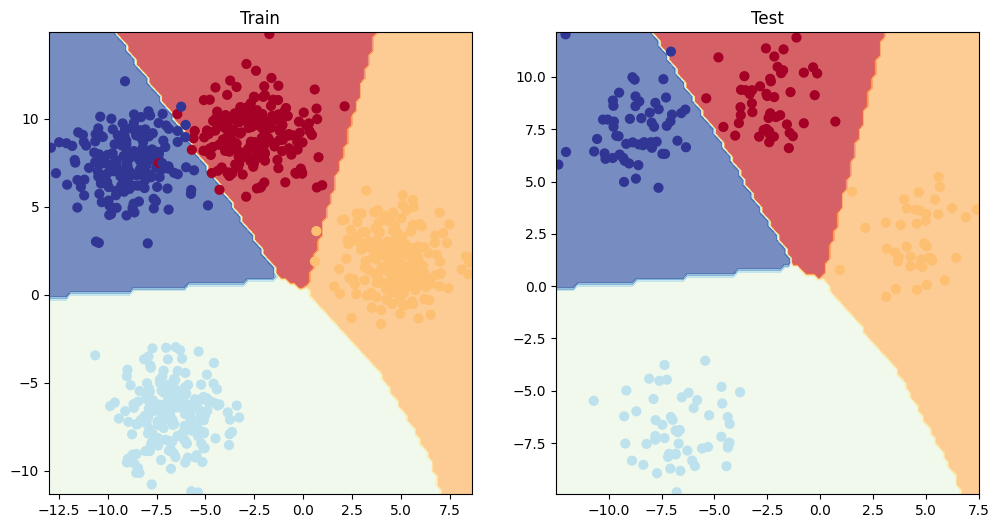

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9 A Few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples,how many deos our model get right?
* Precision
* Recall
* f1-score
* Confusion matrix
* Classification report


In [87]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.7 MB/s eta 0:00:00


In [88]:
from torchmetrics import  Accuracy

In [89]:
torchmetric_accuracy=Accuracy(task='multiclass', num_classes=NUM_CLASSES)

torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)